# Litecoin Predictive Modeling Project
**Please take a look at the Cryptocurrency Data Dive report first for more details on the data:**  https://github.com/paulnebl/Cryptocurrency-Analysis/blob/master/Cryptocurrency%20Data%20Dive.ipynb

I like to use the CRISP-DM data mining methodology. It gives structure to project planning and execution. This report is also written under this methodology.

CRISP-DM - Cross-industry process for data mining:

1.	Business Understanding
2.	Data Understanding
3.	Data Preparation
4.	Modeling
5.	Evaluation
6.	Deployment

**Business and Data Understanding**

The Cryptocurrency markets can change drastically without any warning at any time. This makes it very hard to predict. With this in mind, I chose to only predict one day in the future. A trader can set up a model to run daily with the most current market information. As time goes on, the model can learn new trends and adjust as needed. 

I envision a trader that runs the model each day to determine if he or she will invest in the market that day, and what type of price limit they are willing to buy and sell at. They will then have to run the model again the next day based on the new data. This will help them determine if they want to sell, buy, or hold. Computers can take the emotion out of the trade, so this could be a tool to allow a trader to make more logical, statistics-based decisions instead of by fear or greed. This trading method could even be developed into an automated system that determines what to do at certain intervals. 

Bitcoin gets the most media attention, so I wanted to choose a significant player that gets a little less attention. I took a look at the coefficient of variation in total daily market volume and closing prices between the 5 currencies that I have both blockchain and market data for.  Litecoin is currently the 5th largest cryptocurrency with almost $2 billion in estimated value and ranks fairly average in these two measurements, so I decided it would be the currency to base the project off of. 


In [6]:
from IPython.display import Image

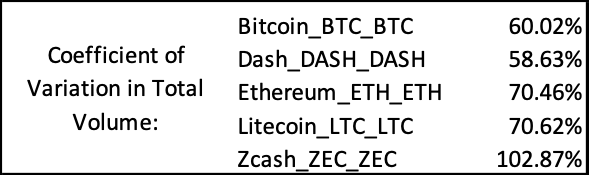

In [13]:
PATH = "/Users/paulnebel/Library/Mobile Documents/com~apple~CloudDocs/Other Stuff/Tech_Eval/img/"
Image(filename=PATH + "Coefficient of Variation.png", width=300, height=150)


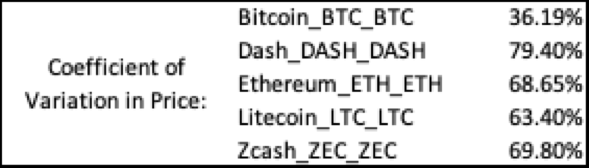

In [14]:
Image(filename=PATH + "Coefficient of Variation in Price.png", width=300, height=150)

Cryptocurrency Data Used:

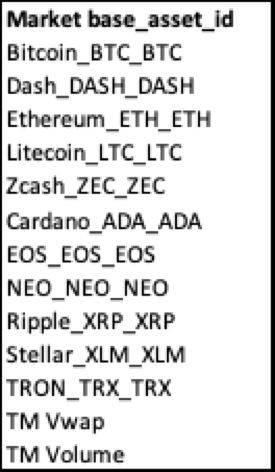

In [16]:
Image(filename=PATH + "Market Base Assets.png", width=150, height=75)

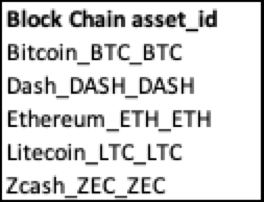

In [17]:
Image(filename=PATH + "Blockchain Assets.png", width=150, height=75)

Market Data Fields

1.	base_asset_id -- id for the given asset
2.	quote_asset_id -- id for the asset that the base is quoted in (should all be US Dollars)
3.	epoch_ts -- timestamp for the row (daily)
4.	price_open -- opening price (USD)
5.	price_high 
6.	price_low
7.	price_close -- closing price (USD)
8.	price_mean_a -- arithmetic mean of price (USD) 
9.	price_std -- standard deviation of price (USD)
10.	price_vwap_a -- arithmetic volume weighted average price
11.	price_vwap_h -- harmonic volume weighted average price
12.	cnt_total -- transaction count
13.	volume_total -- total market transacted volume
14.	volume_high -- volume of highest volume market transaction
15.	volume_low -- volume of lowest volume market transaction
16.	volume_mean_a -- arithmetic mean of market volume
17.	volume_std -- standard deviation of market volume

Blockchain Data

1.	asset_id -- id for the given asset
2.	epoch_ts -- timestamp for the row (daily)
3.	volume_sum -- total transacted blockchain volume
4.	volume_high -- volume of highest volume blockchain transaction
5.	volume_low -- volume of lowest volume blockchain transaction
6.	volume_mean_q -- quadratic mean of blockchain transaction volume
7.	volume_mean_a -- arithmetic mean of blockchain transaction volume
8.	volume_mean_g -- geometric mean of blockchain transaction volume
9.	volume_mean_h -- harmonic mean of blockchain transaction volume
10.	volume_std -- standard deviation of blockchain transaction volume
11.	coinbase_volume -- total volume of the days coinbase transactions
12.	txn_count -- blockchain transaction count
13.	fee_sum -- total blockchain fee volume
14.	fee_high -- volume of highest volume blockchain fee
15.	fee_low -- volume of lowest volume blockchain fee
16.	fee_mean_q -- quadratic mean of blockchain fee volume
17.	fee_mean_a -- arithmetic mean of blockchain fee volume
18.	fee_mean_g -- geometric mean of blockchain fee volume
19.	fee_mean_h -- harmonic mean of blockchain fee volume
20.	fee_std -- standard deviation of blockchain fee volume
21.	block_reward_sum -- total block of issued block rewards
22.	supply_total -- number of issued assets
23.	blockchain_size -- size of the total blockchain (bytes)

**Data Preparation**

This data is fairly clean, and with almost no missing data points. To save time, I downloaded a free 30 day trial copy of SPSS Modeler to build the models. I also used Excel for cleaning and managing the data. I like to write down each step that I take in building a model in detail for reference. I also keep several copies of the data based on the steps that I take. If I need to go back and see what I did, this makes it much easier. Here are some of the more important steps that I took:

1.	Create a field “Tomorrow’s Close”. This will be the predicted field for numeric prediction models.
2.	Create a field “Up or Down Tomorrow” for categorical predictive models
3.	Create lags of 1,7 and 14 days for some of the variables. Curious to see if the lags have any predictive power.


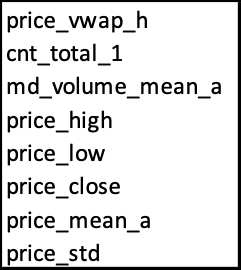

In [19]:
Image(filename=PATH + "Lag Variables.png", width=150, height=75)

4.	Join the data based on date and type of currency

5.	Partition the data into a 25% validation partition and a 75% training partition
a.	I kept out the first 14 observations because these lines are used in building the lags
b.	The month of February, 2019 is left out. These lines will be used to do a final test on the model
6.	Understand how SPSS Modeler is interpreting the data and make sure it is appropriate (Nominal, ordinal, categorical, etc.)
7.	Transform all continuous input fields into a common scale with z-score transformation with a final mean of 0 and a final standard deviation of 1. 
8.	Let SPSS Modeler create feature selection with the continuous input fields
a.	I tested some models with these features. At times they helped slightly, but overall, I did not find them to be useful for this project.
9.	SPSS Modeler has a feature that places a scale on all fields for the amount of predictive power that they hold. Through testing, I found that these fields did actually hold predictive capabilities.

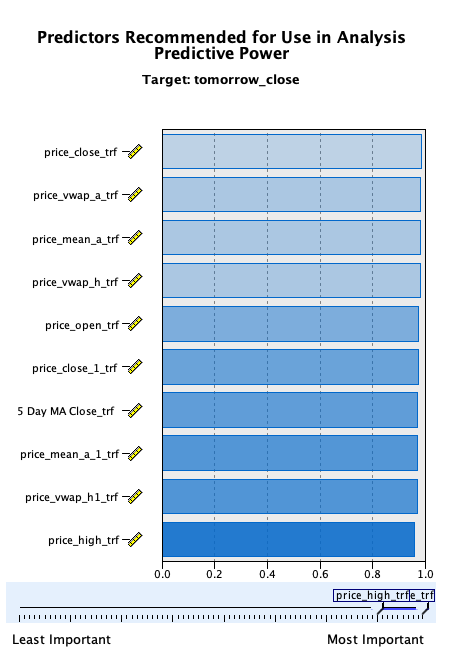

In [22]:
Image(filename=PATH + "Predictors Recommended.png", width=500, height=450)

**Modeling and Evaluation**

This is the first time that I have used SPSS Modeler. In the past I have used JMP and Python. Making models in SPSS is actually a lot of fun, and a little addictive. They make it very easy to try several different modeling algorithms. It’s interesting to see what fields are chosen, and the statistics that are produced. You can start with a very simple model, see how long it takes to run, then build it up with more complicated techniques. 


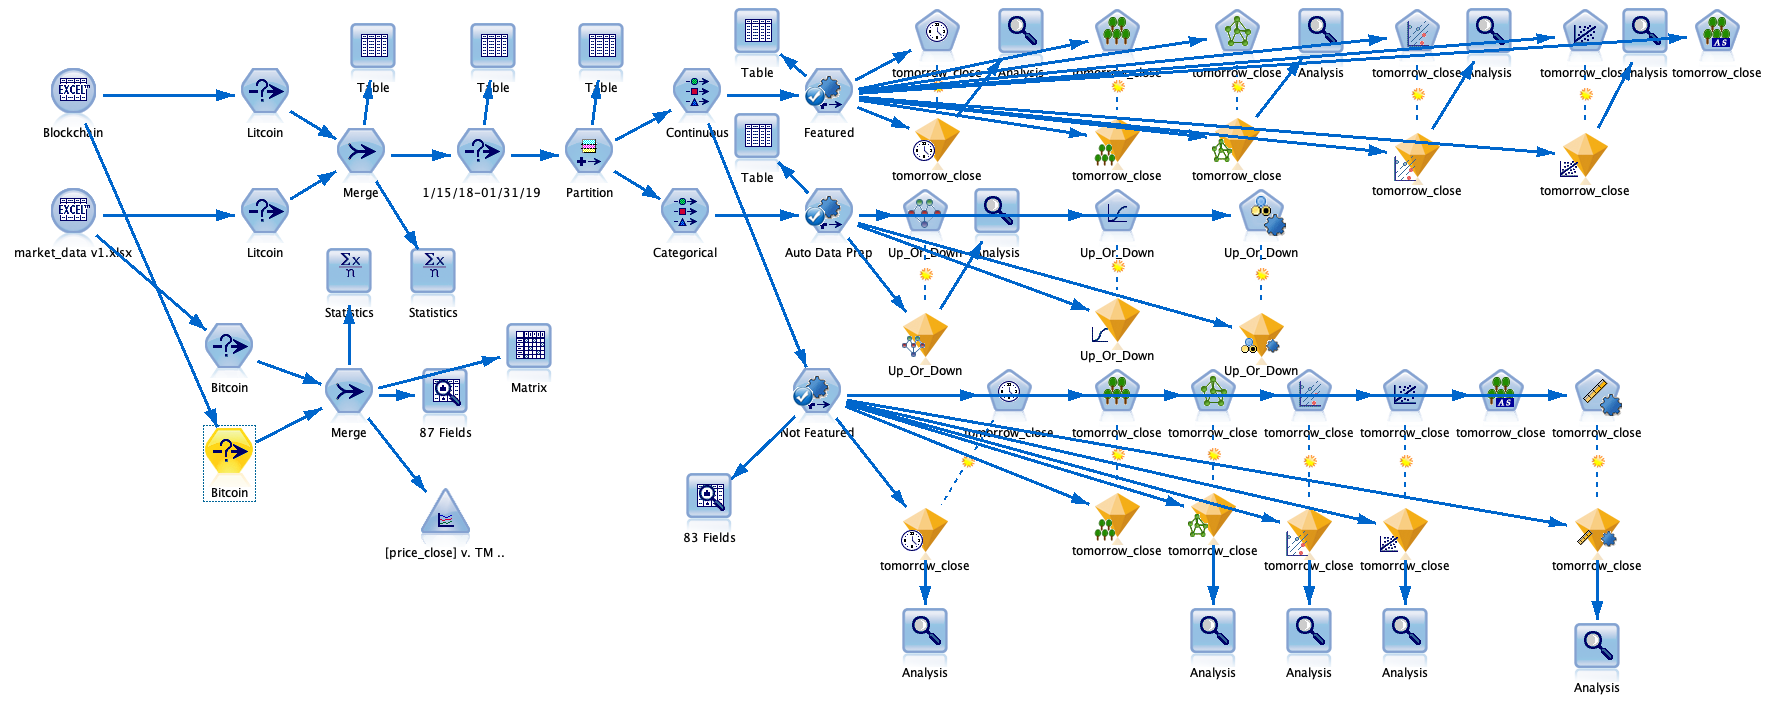

In [24]:
Image(filename=PATH + "Model Stream.png", width=1000, height=1100)

SPSS Modeler’s Time Series Node has a feature where you set the field used for time, the predictive variables, and output field. It then determines which fields and time series models will be the most effective for your data set. It also determines what types of lags to use. This feature chose Exponential Smoothing to build the model. Here are the types of time series models that are available with this feature:
<br>
<br> a.	Exponential smoothing
<br> b.	ARIMA
<br> c.	Multivariate ARIMA

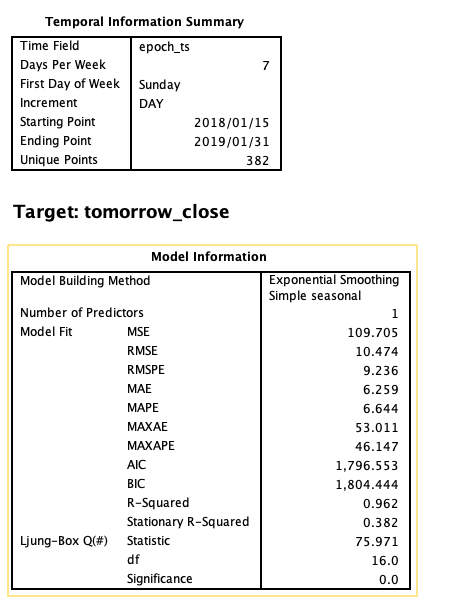

In [26]:
Image(filename=PATH + "Time Series Metrics 1.png", width=500, height=500)

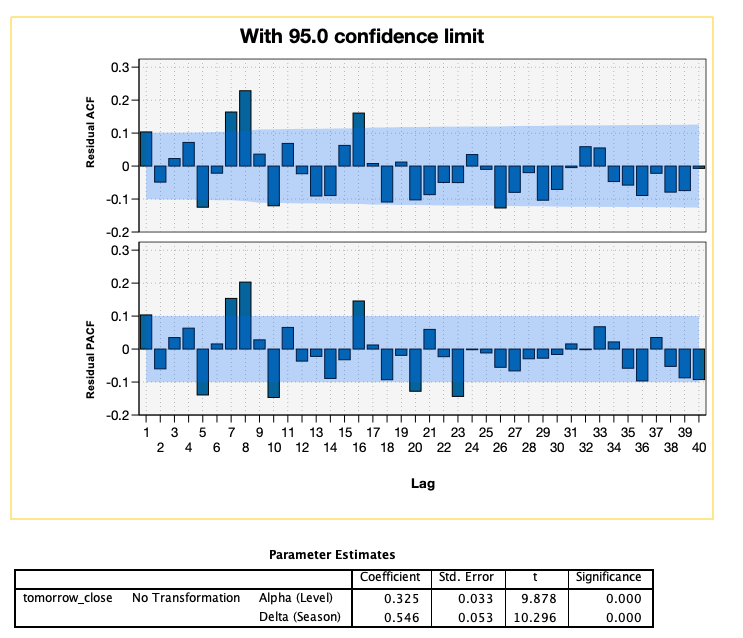

In [27]:
Image(filename=PATH + "Time Series Metrics 2.png", width=500, height=500)

Here are some other models that were tried with notes on their performance:

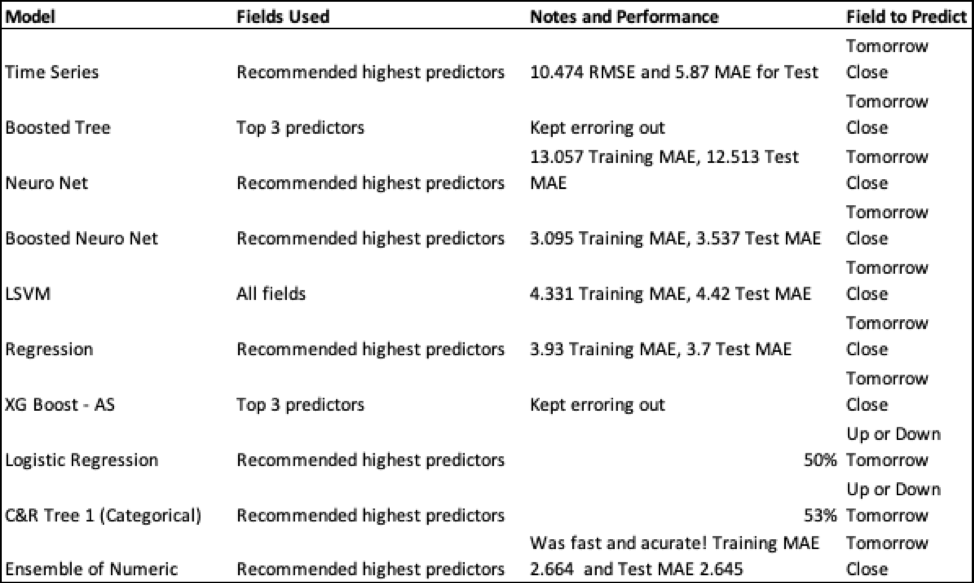

In [30]:
Image(filename=PATH + "Model Performance.png", width=1000, height=1000)

Final Model – The Ensemble method did the best. It chose to use three models: Random Trees, Linear Regression, and Random Forest. Here are some more details associated with this method:

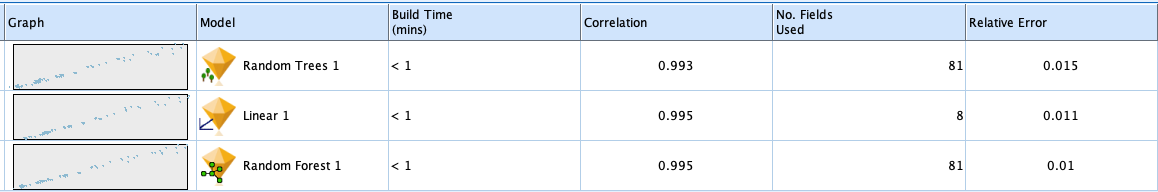

In [31]:
Image(filename=PATH + "Numeric Ensemble Models.png", width=1000, height=1000)

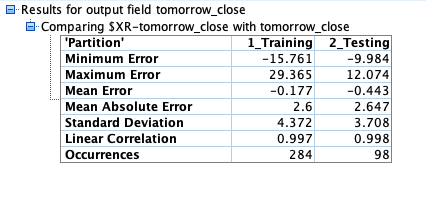

In [34]:
Image(filename=PATH + "Numeric Ensemble Test and Training.png", width=500, height=500)

**Deployment**

The real test of any model is how well it does performing the task it was built to do. In this case, that is making money! To test this, my plan was to run the model 18 times for each of the last 18 days in the data sets. Each time I give the model the entire data set up to the day being tested for training. I then record the predicted value created for each tested day. If the model says that the closing price will be higher than the closing price of the previous day, I would place a thousand dollars of fictitious money on the opening price and record the profit or loss from opening price to closing price. If the model works, this method should have better returns than only holding your money in the market for the entire time, or by buying and selling a thousand dollars every day. Due to time restraints, this portion was put on hold, and can be done at a later point. 

Through development, I discovered several opportunities for further exploration. I am curious how seasonality has an effect on cryptocurrency trading volumes. To refine the model, I think the lag lengths can be adjusted. This will be especially helpful with linear regression models. The amount of data being used for training has a major effect on the predictions as well. I doubt the model is gaining any insights from analyzing data from last year to predict tomorrow’s close. The trade environment has completely changed.

Someone could spend an entire career looking at the possibilities. Global economics, human psychology, current events, technology, competition, and many other things all play a part. 